<h2>Crab age prediction model</h2>

<p>The model here created will be able to predict crab age based on given biometrics and sex. Model will take as input features listed below:</p>

<ul>
    <li>Sex -> String; Values=['I','M','F']</li>
    <li>Length -> float</li>
    <li>Diameter -> float</li>
    <li>Height -> float</li>
    <li>Weight -> float</li>
    <li>Shucked Weight -> float</li>
    <li>Viscera Weight -> float</li>
    <li>Shell Weight -> float</li>
</ul>

<p>The target will be Age value that type is int. We will use Random forest model.</p>

<p>For data cleaning look up file data_analysis.ipynb</p>

<p>For model evaluation look up file model_eval.ipynb</p>

<h3>-- Imports</h3>

In [12]:
import import_data_module
import data_cleaner_module
import data_preparation_module
import model_creator_module
import model_metrics_module
import matplotlib.pyplot as plt
from scipy.stats import randint

<h3>-- Data import</h3>

In [13]:
crab_data = import_data_module.import_dataframe_from_csv(path="../model_data/CrabAgePrediction.csv")

<h3>-- Data clean</h3>

In [14]:
clean_crab_data = data_cleaner_module.clean_Data(crab_data)

<small>---- index reset</small>

In [15]:
clean_crab_data.reset_index(drop=True, inplace=True)

<h3>-- Data preparation</h3>

<small>---- Data enrichment</small>

In [16]:
enriched_data = data_preparation_module.enrich_rf_features(clean_crab_data)

<small>---- Data standarization and encoding</small>

In [17]:
prepared_data = data_preparation_module.prepare_cleaned_data(enriched_data)

<small>---- Data split</small>

In [18]:
X_train, X_test, y_train, y_test = data_preparation_module.split_data(prepared_data, target_name="Age")

<h3>Model creation</h3>

In [19]:
rf_model = model_creator_module.create_rf_model(X_train, y_train, in_max_depth=7, in_max_features='sqrt', in_min_samples_leaf=2, 
                                                in_min_samples_split=6, in_n_estimators=215)

<h3>Model evaluation</h3>

<small>---- Metrics</small>

Mae: 1.454508362639446
 Mse: 4.32731311619216 
 RMSE: 2.0802194875041815 
 R2: 0.577983361363434


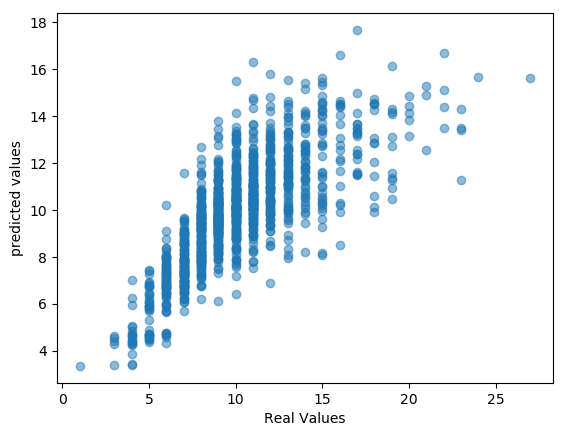

In [20]:
model_predict, mae, mse, rmse, r2 = model_metrics_module.get_model_metrics(rf_model, X_test, y_test)

print(f"Mae: {mae}\n Mse: {mse} \n RMSE: {rmse} \n R2: {r2}")

plt.scatter(y_test, model_predict, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("predicted values")

plt.show()

<small>---- Cross validation</small>

In [21]:
cv_scores, cv_scores_mean, cv_scores_std = model_metrics_module.get_cross_validation_metrics(rf_model, X_train, y_train)

print(f"Scores: {cv_scores}\n Mean: {cv_scores_mean}\n Devation: {cv_scores_std}")

Scores: [0.55572574 0.5629015  0.58749863 0.57748007 0.58917277]
 Mean: 0.5745557419828142
 Devation: 0.013267387551006558


<small>---- Best parameters</small>

In [22]:
params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

best_params = model_metrics_module.model_params_random_search(params, rf_model, X_train, y_train)

print(f"Best params: {best_params}")

Best params: RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=7, n_estimators=125)


Note: Random search for now give 2 diffrent option.

1. max_depth=8, max_features='sqrt', min_samples_leaf=2, min_samples_split=7, n_estimators=125
2. The params used in model creation

Both work similar and there's no significant diffrence to them.